# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.813810e+01     1.850328e+01
 * time: 0.0014829635620117188
     1     3.129271e+01     7.892230e+00
 * time: 0.00681304931640625
     2     2.850819e+01     8.543620e+00
 * time: 0.011880874633789062
     3     2.287389e+01     6.051876e+00
 * time: 0.01694488525390625
     4     1.976927e+01     1.768173e+00
 * time: 0.022064924240112305
     5     1.913563e+01     3.905242e+00
 * time: 0.026147842407226562
     6     1.863425e+01     3.048933e+00
 * time: 0.03142094612121582
     7     1.831565e+01     2.399635e+00
 * time: 0.03568100929260254
     8     1.789174e+01     1.356910e+00
 * time: 0.039940834045410156
     9     1.755953e+01     9.443776e-01
 * time: 0.04409193992614746
    10     1.738048e+01     7.889502e-01
 * time: 0.04832005500793457
    11     1.725478e+01     8.164226e-01
 * time: 0.05257606506347656
    12     1.716291e+01     1.040789e+00
 * time: 0.07991504669189453
    13     1.710904e+01     6.199462e-01
 *

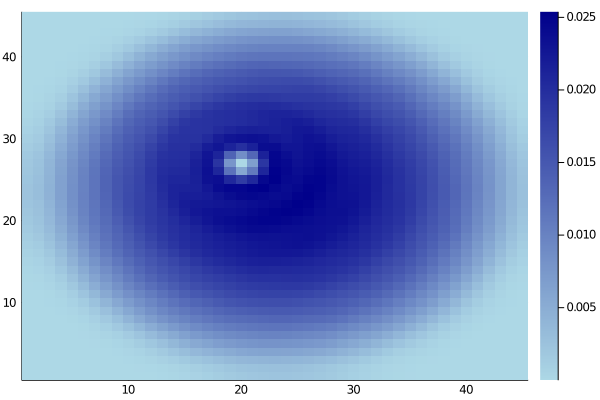

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)